In [1]:
#importing necessary libraries
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
#importing dataset
finale=pd.read_csv('SPD_Crime_Data__2008-Present.csv')

In [11]:
#calculating the percentage of null values in each column
f=finale.isnull().sum()
f1=f[f>0]
percent=(f1/len(finale))*100

In [38]:
#dropping offense end date due to high percentage of null values and dropping longitude and latitude because we have a location marker already 'MCPP'
drop= ['Offense End DateTime','Longitude','Latitude']
finale1 = finale
finale1.drop(columns=drop, inplace=True)

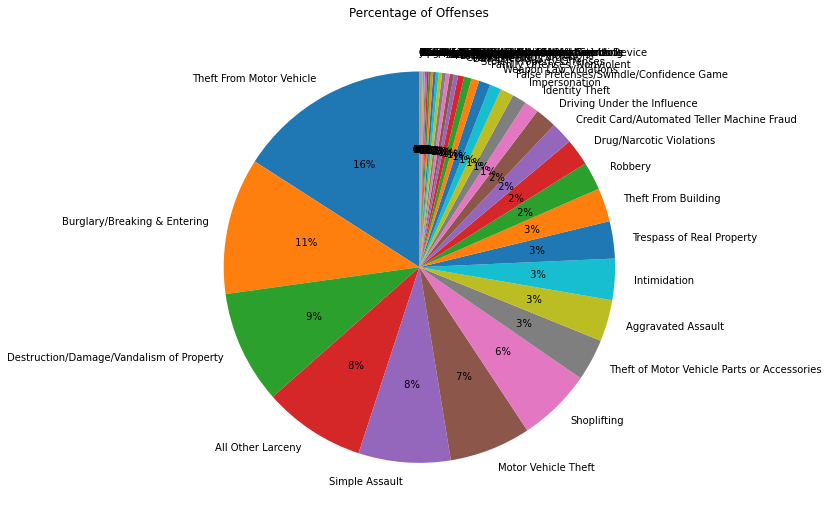

In [27]:
#Question 2
#getting count for values of pie chart
fi=finale['Offense'].value_counts()
#plotting pie chart
fig, ax = plt.subplots(figsize=(15,9))

ax.pie(fi, labels=fi.index, autopct ='% .f%%', startangle = 90)
  
ax.set_title('Percentage of Offenses')

plt.show()

#conclusion theft from motor vehicles is at a high rate in this report and it is riskier for car owners, breaking and entering may also ben consideered a risk factor as it is high as well which means people or individuals would havbe to secure their house properly

In [56]:
#Question 3
#converting to date time values to be able to get month year and time for better unterpretation
finale1['Report DateTime'] = pd.to_datetime(finale['Report DateTime'])

finale1['report month']=pd.to_datetime(finale['Report DateTime'], format = '%m/%d/%Y').dt.month 
finale1['report year']=pd.to_datetime(finale['Report DateTime'], format = '%m/%d/%Y').dt.year
finale1['report time']=pd.to_datetime(finale['Report DateTime']).dt.hour

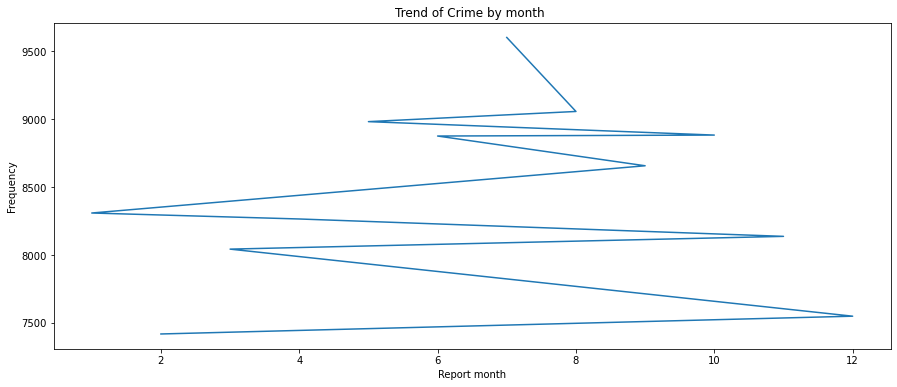

In [57]:
#our specific offense is vandalism
finale2=finale1[finale1.Offense == 'Destruction/Damage/Vandalism of Property']
#getting the number of counts for each month
fina = finale2.value_counts('report month').to_frame().reset_index().dropna()
fina.columns = ['report month', 'Count']
#plotting line chart
plt.figure(figsize=(15,6))
plt.plot(fina['report month'],fina.Count) 
plt.xlabel('Report month') 
plt.ylabel('Frequency')
plt.title('Trend of Crime by month ') 
plt.show() 
#the line chart shows there is a peak of destruction in july and around may to july it is high, this may be regarded as summer time and may be a result of letting loose or unneccessary or lacadestical behavior from children or adults as this is considered holiday time

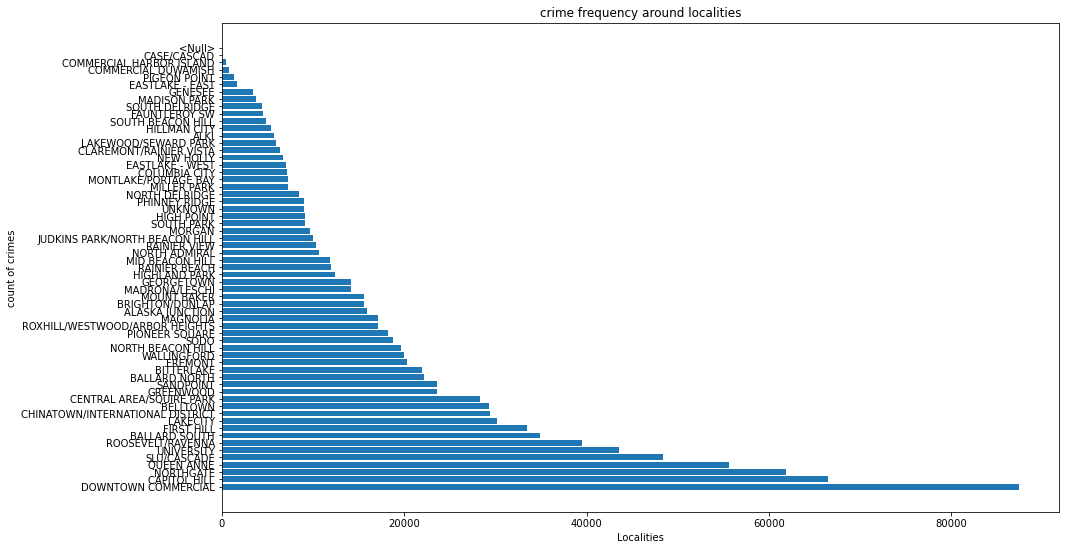

In [58]:
#Question 4
#creating a seperate dataset to get just the values of localities
fin = finale.value_counts('MCPP').to_frame().reset_index().dropna()

fin.columns = ['MCPP', 'Count']
#plotting bar chart
fig, ax = plt.subplots(figsize=(15,9))

ax.barh(fin['MCPP'], fin.Count)

ax.set_xlabel('Localities')
ax.set_ylabel('count of crimes')
ax.set_title('crime frequency around localities')

plt.show()
#the highest places are downtown commercial, capitow hill and north gate these places would most likely be cheaper to live in as most individuals would not like to be associated with here, while commercial harbor island, commercial duwarmish and case, these places would most likely be more secure and have high rent due to the positive safety reports

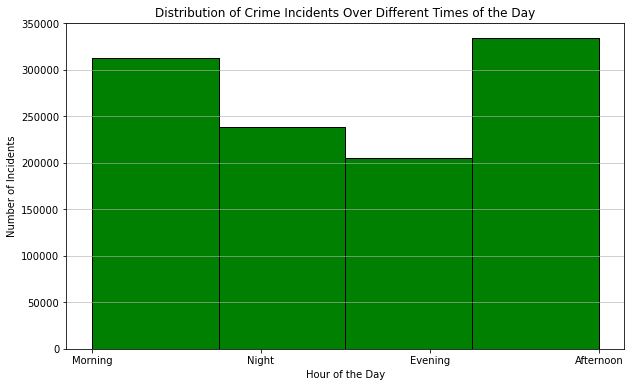

In [52]:
# Assuming 'Report DateTime' is the column containing the timestamp in your DataFrame
#getting exact periods of the day
def categorize_time_period(report_time):
    if 5 <= report_time < 12:
        return 'Morning'
    elif 12 <= report_time < 17:
        return 'Afternoon'
    elif 17 <= report_time < 21:
        return 'Evening'
    else:
        return 'Night'
    
finale1['report period'] = finale['report time'].apply(categorize_time_period)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(finale1['report period'], bins=4, color='g', edgecolor='black')
plt.title('Distribution of Crime Incidents Over Different Times of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')
plt.grid(axis='y', alpha=0.75)

# Displaying the histogram
plt.show()
#late afternoons and early mornings have the highest rates of crime due to ease of mind and less commercial activity while active periods do not have as much crime

C:\Users\NWOSU\AppData\Local\Temp\ipykernel_13720\4205851357.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Hour'] = pd.to_datetime(final['Report DateTime']).dt.hour


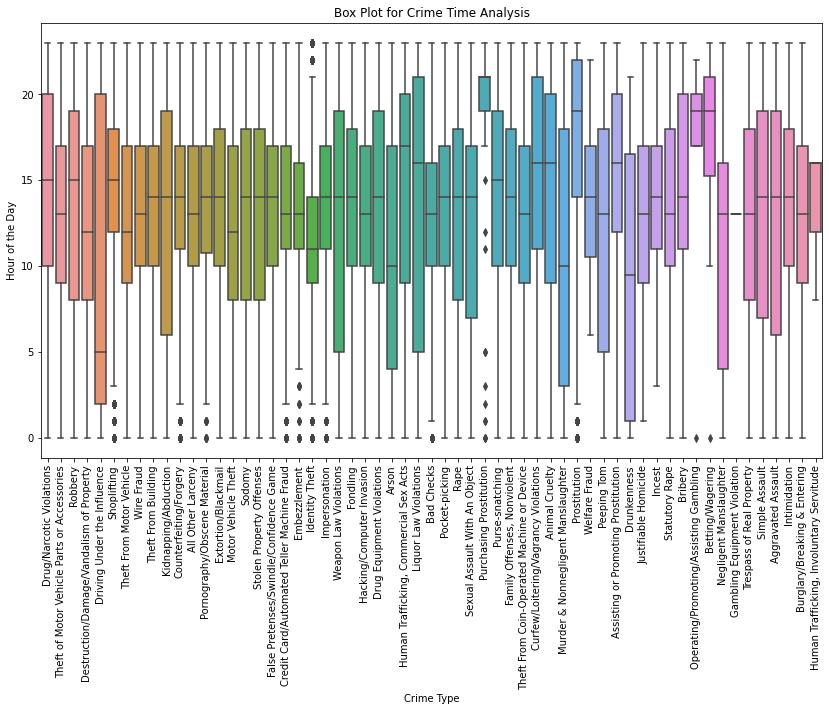

In [60]:
#Question 6
final= finale1[['Offense', 'Report DateTime']]

# Extracting hour from the timestamp
final['Hour'] = pd.to_datetime(final['Report DateTime']).dt.hour
sns.set_palette("Set1")

# Plotting a box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Offense', y='Hour', data=final)
plt.title('Box Plot for Crime Time Analysis')
plt.xlabel('Crime Type')
plt.ylabel('Hour of the Day')

# Rotating x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Displaying the box plot
plt.show()